In [1]:
import numpy as np
import numpy.linalg
import scipy.linalg
import matplotlib.pyplot as plt

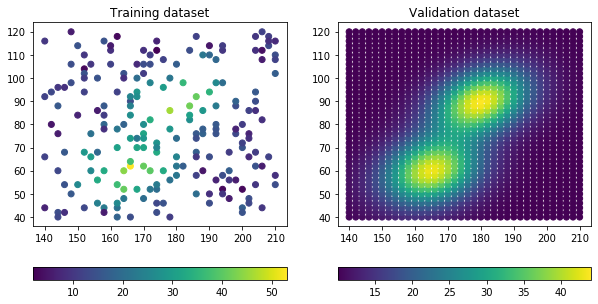

In [2]:
train = np.genfromtxt(fname='resources/ex5/TrainingRidge.csv', delimiter=',',
                       dtype=np.float, skip_header=1)
val = np.genfromtxt(fname='resources/ex5/ValidationRidge.csv', delimiter=',',
                       dtype=np.float, skip_header=1)

f = plt.figure(figsize=(10,5))
ax1 = f.add_subplot(121)
ax2 = f.add_subplot(122)

sc1 = ax1.scatter(train[:,0], train[:,1], c = train[:,2], cmap='viridis')
ax1.set(title='Training dataset')

sc2 = ax2.scatter(val[:,0], val[:,1], c = val[:,2], cmap='viridis')
ax2.set(title='Validation dataset')
f.colorbar(sc1, ax = ax1, orientation='horizontal', fraction=.1)
f.colorbar(sc2, ax = ax2, orientation='horizontal', fraction=.1)

plt.show()

In [3]:
train_number = train.shape[0]
x_t_avg = np.array([np.sum(train[:,0]), np.sum(train[:,1])]) / train_number
x_centered = train[:, :2] - x_t_avg
X_t_c = x_centered.T
X_t = train[:, :2].T
Cov =  np.matmul(X_t_c, X_t_c.T) / train_number
e_values, e_vectors = np.linalg.eig(Cov)
e_values_mat = np.zeros((e_values.size, e_values.size))
for i in range(e_values.size):
    e_values_mat[i,i] = e_values[i]

x_val_centered =  val[:, :2] - x_t_avg #Important, used center from train set
X_v_c = x_val_centered.T 
X_v = val[:, :2].T

x_sphered  = (scipy.linalg.fractional_matrix_power(e_values_mat, -1/2) @ e_vectors.T @ x_centered.T).T
x_val_sphered = (scipy.linalg.fractional_matrix_power(e_values_mat, -1/2) @ e_vectors.T @ x_val_centered.T).T

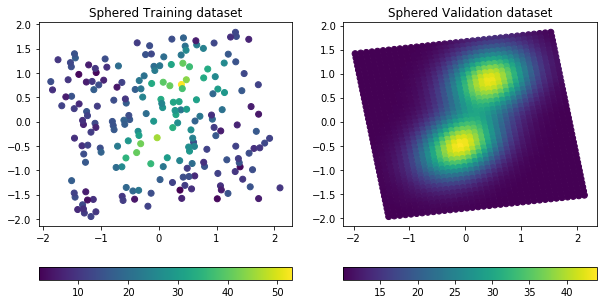

In [4]:
f = plt.figure(figsize=(10,5))
ax1 = f.add_subplot(121)
ax2 = f.add_subplot(122)

sc1 = ax1.scatter(x_sphered[:,0], x_sphered[:,1], c = train[:,2], cmap='viridis')
ax1.set(title='Sphered Training dataset')

sc2 = ax2.scatter(x_val_sphered[:,0], x_val_sphered[:,1], c = val[:,2], cmap='viridis')
ax2.set(title='Sphered Validation dataset')
f.colorbar(sc1, ax = ax1, orientation='horizontal', fraction=.1)
f.colorbar(sc2, ax = ax2, orientation='horizontal', fraction=.1)

plt.show()

In [22]:
order = 9
d = 55
phi = np.zeros((d, x_centered.shape[0]))
row = 0
for i in range(order + 1):
    for j in range(i + 1):
        phi[row] = pow(X_t_c[0], j) * pow(X_t_c[1], i-j)
        row = row + 1
        
y_train = train[:,2].reshape((1, train.shape[0]))
tmp = phi @ phi.T
w_star = np.linalg.inv(tmp) @ phi @ y_train.T
y_predict = w_star.T @ phi

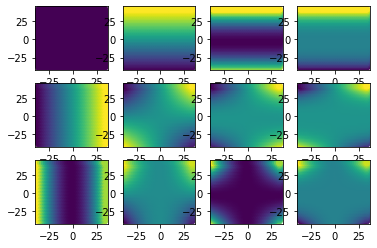

In [34]:
order_to_visualize = 3

fig, ax = plt.subplots(nrows=3, ncols=4)

for i, row in enumerate(ax):
    for j, col in enumerate(row):
        monomial = pow(x_val_centered[:, 0], i) * pow(x_val_centered[:, 1], j)
        col.scatter(x_val_centered[:,0], x_val_centered[:,1], c = monomial, cmap='viridis')

plt.show()

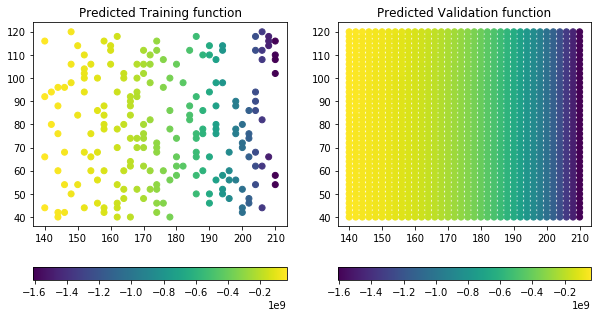

In [45]:
phi_val = np.zeros((d, x_val_centered.shape[0]))
row = 0
for i in range(order + 1):
    for j in range(i + 1):
        phi_val[row] = pow(X_v_c[0], j) * pow(X_v_c[1], i-j)
        row = row + 1
y_val = w_star.T @ phi_val


def predict(x1, x2, m_order, m_d):
    phi_tmp = np.zeros((m_d, 1))
    m_row = 0
    for i in range(m_order + 1):
        for j in range(i + 1):
            phi_tmp[m_row] = pow(x1, j) * pow(x2, i-j)
            m_row = m_row + 1
    return float(w_star.T @ phi_tmp)

val_preds = []
for pred in val:
    val_preds.append(predict(pred[0], pred[1], order, d))
   
train_preds = []
for pred in train:
    train_preds.append(predict(pred[0], pred[1], order, d))

f = plt.figure(figsize=(10,5))
ax1 = f.add_subplot(121)
ax2 = f.add_subplot(122)

sc1 = ax1.scatter(train[:,0], train[:,1], c = train_preds, cmap='viridis')
ax1.set(title='Predicted Training function')

sc2 = ax2.scatter(val[:,0], val[:,1], c = val_preds, cmap='viridis')
ax2.set(title='Predicted Validation function')
f.colorbar(sc1, ax = ax1, orientation='horizontal', fraction=.1)
f.colorbar(sc2, ax = ax2, orientation='horizontal', fraction=.1)

plt.show()